In [2]:
import numpy as np
import pandas as pd
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
df["job"]= LabelEncoder().fit_transform(df["job"])
print(df["job"].value_counts())

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64


In [9]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [10]:
df["marital"]= LabelEncoder().fit_transform(df["marital"])
print(df["marital"].value_counts())

1    6351
2    3518
0    1293
Name: marital, dtype: int64


In [11]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [12]:
df["education"]= LabelEncoder().fit_transform(df["education"])
print(df["education"].value_counts())

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64


In [13]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [14]:
df["default"]= LabelEncoder().fit_transform(df["default"])
print(df["default"].value_counts())

0    10994
1      168
Name: default, dtype: int64


In [15]:
df['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [16]:
df["housing"]= LabelEncoder().fit_transform(df["housing"])
print(df["housing"].value_counts())

0    5881
1    5281
Name: housing, dtype: int64


In [17]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [18]:
df["loan"]= LabelEncoder().fit_transform(df["loan"])
print(df["loan"].value_counts())

0    9702
1    1460
Name: loan, dtype: int64


In [19]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [25]:
df["contact"]= LabelEncoder().fit_transform(df["contact"])
print(df["contact"].value_counts())

0    8042
2    2346
1     774
Name: contact, dtype: int64


In [20]:
df['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [21]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [22]:
df["poutcome"]= LabelEncoder().fit_transform(df["poutcome"])
print(df["poutcome"].value_counts())

3    8326
0    1228
2    1071
1     537
Name: poutcome, dtype: int64


In [23]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [24]:
df["deposit"]= LabelEncoder().fit_transform(df["deposit"])
print(df["deposit"].value_counts())

0    5873
1    5289
Name: deposit, dtype: int64


In [146]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
 
x = df.drop(['day','month', 'deposit'], axis=1)
y = df['deposit']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [147]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,9,2,172,5,0


In [148]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=14)),
model.add(Dropout(0.2)),
model.add(Dense(800, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 1000)              15000     
                                                                 
 dropout_86 (Dropout)        (None, 1000)              0         
                                                                 
 dense_136 (Dense)           (None, 800)               800800    
                                                                 
 dropout_87 (Dropout)        (None, 800)               0         
                                                                 
 dense_137 (Dense)           (None, 1)                 801       
                                                                 
Total params: 816,601
Trainable params: 816,601
Non-trainable params: 0
_________________________________________________________________


In [165]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)


Epoch 1/10
90/90 [==============================] - 2s 23ms/step - loss: 0.4542 - accuracy: 0.7936 - val_loss: 0.4369 - val_accuracy: 0.8061
Epoch 2/10
90/90 [==============================] - 1s 15ms/step - loss: 0.4444 - accuracy: 0.7981 - val_loss: 0.4516 - val_accuracy: 0.7949
Epoch 3/10
90/90 [==============================] - 1s 16ms/step - loss: 0.4414 - accuracy: 0.7994 - val_loss: 0.4381 - val_accuracy: 0.8092
Epoch 4/10
90/90 [==============================] - 1s 16ms/step - loss: 0.4469 - accuracy: 0.7956 - val_loss: 0.4425 - val_accuracy: 0.8012
Epoch 5/10
90/90 [==============================] - 1s 15ms/step - loss: 0.4447 - accuracy: 0.7956 - val_loss: 0.4442 - val_accuracy: 0.8025
Epoch 6/10
90/90 [==============================] - 1s 14ms/step - loss: 0.4426 - accuracy: 0.7974 - val_loss: 0.4722 - val_accuracy: 0.7940
Epoch 7/10
90/90 [==============================] - 1s 14ms/step - loss: 0.4431 - accuracy: 0.7987 - val_loss: 0.4451 - val_accuracy: 0.8021
Epoch 8/10
90

[]

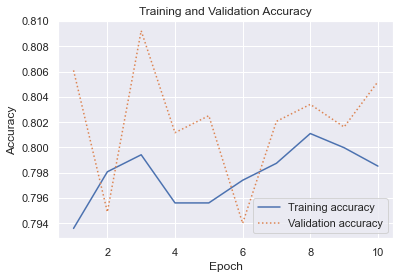

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()